In [2]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.defchararray import add
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [3]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [34]:
# general plotting function
def plotGen(inputfile, lineScatterFillORPolygon, color, linewidthORmarkersize):
    data = np.array(genfromtxt(inputfile,  comments="#", delimiter='\t'))
    #print(lineScatterFillORPolygon)
    
    if (lineScatterFillORPolygon=="polygon"):
        ax.fill(data[:,0],data[:,1], color)
    else:
        data=data[np.argsort(data[:, 0])]

        if (lineScatterFillORPolygon=="line"):
            ax.plot(data[:,0],data[:,1],c=color,linewidth=linewidthORmarkersize)
        if (lineScatterFillORPolygon=="scatter"):
            ax.plot(data[:,0],data[:,1],c=color,s=linewidthORmarkersize)
        if (lineScatterFillORPolygon=="fill"):
            ax.fill_between(data[:,0],data[:,1],10**(-2),color=color,linewidth=linewidthORmarkersize,alpha=0.5)

#Plot all the data in folder
def plotFromFolder(folder,iftoreverse,lineScatterFillORPolygon,colorMAP,width):
    
    colormap=colorMAP
    
    #reading files with histos info (reverse fuction changes the order of the files)
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    #print(files)
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    for filenum, file in enumerate(files):
        print(file)
        
        plotGen(file,lineScatterFillORPolygon,colormap(normalize(filenum)),width)
        
        usedcolors.append(colormap(normalize(filenum)))
        
# function that plots cut-out regions from 1612.07818

def whiteregions(m):
    return np.heaviside(m - 0.25,0)*np.heaviside(-m + 0.4,0) + np.heaviside(m - 0.5,0)*np.heaviside(-m + 2.9,0)\
    + np.heaviside(m - 3.2,0)*np.heaviside(-m + 3.6,0) + np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)

def plotWhiteRegions(yupper):
    m=np.linspace(0.2,5,num=100);
    plt.fill_between(m,whiteregions(m),yupper,color="white",zorder=1)

results/LHCB/0-m-alpha_exclusion_DBR0_Bplus-Kplus.dat
results/LHCB/1-0-m-alpha_exclusion_DBR0.5_Bplus-Kplus.dat
results/LHCB/2-0-m-alpha_exclusion_DBR0.9_Bplus-Kplus.dat
results/LHCB/3-0-m-alpha_exclusion_DBR0.97_Bplus-Kplus.dat
results/LHCB/4-0-m-alpha_exclusion_DBR0.98_Bplus-Kplus.dat


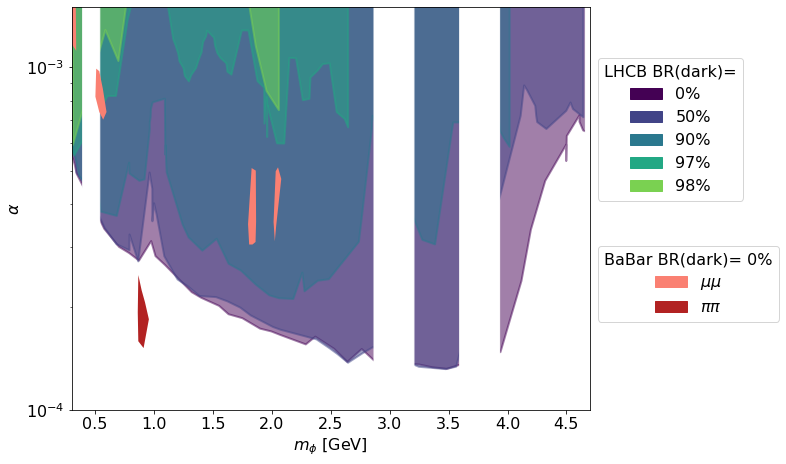

In [45]:
fig=plt.figure(figsize=(12, 7))
ax  = fig.add_subplot(111)
ax.set_position([0.1,0.1,0.6,0.8])

plotFromFolder("results/LHCB",False,"fill",cm.viridis,2)
plotWhiteRegions(10**(-2))

babarFolder="results/BaBar/"
mucolor="salmon"
picolor="firebrick"

plotGen(babarFolder+"0-0-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"0-1-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"0-2-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"0-3-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"1-m-alpha_exclusion_DBR0_BaBar_pipi.dat","polygon", picolor,1)

ax.set_xlim( (0.3, 4.7))
ax.set_ylim((10**(-4),1.5*10**(-3)))

#plt.title(''.format(i))
ax.set_xlabel('$m_\\phi$ [GeV]')
ax.set_ylabel('$\\alpha$')

ax.set_yscale("log")


patch0 = mpatches.Patch(color=usedcolors[0], label='0%')
patch1 = mpatches.Patch(color=usedcolors[1], label='50%')
patch2 = mpatches.Patch(color=usedcolors[2], label='90%')
patch3 = mpatches.Patch(color=usedcolors[3], label='97%')
patch4 = mpatches.Patch(color=usedcolors[4], label='98%')

patch5 = mpatches.Patch(color=mucolor, label='$\\mu \\mu$')
patch6 = mpatches.Patch(color=picolor, label='$\\pi \\pi$')


babarLegend=plt.legend(handles=[patch5,patch6],loc='lower left',\
           bbox_to_anchor=(1, 0.2, 0.5, 2),title="BaBar BR(dark)= 0%")

ax.legend(handles=[patch0,patch1,patch2,patch3,patch4],loc='lower left',\
           bbox_to_anchor=(1, 0.5, 0.5, 1),title="LHCB BR(dark)=")
plt.gca().add_artist(babarLegend)

fig.savefig('./results/m-alpha_combined.png')